<a href="https://colab.research.google.com/github/kevinNdyabandiho/-googlecolab/blob/master/122787_reinforceimentlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def print_map(array):
    plt.imshow(array, cmap='hot', vmin = np.min(array), vmax = np.max(array))
    plt.show()

In [ ]:
## Env
e_rows = 11
e_cols = 11

q_values = np.zeros((e_rows, e_cols, 4))

actions = ['up', 'right', 'down', 'left']

rewards = np.full((e_rows, e_cols), -100)
rewards[0, 5] = 100

In [ ]:
aisles = {}

aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] =  [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]


for row_index in range(1, 10):
    for col_index in aisles[row_index]:
        rewards[row_index][col_index] = -1

In [ ]:
# Training
def is_terminal_state(cur_row_index, cur_col_index):
    if rewards[cur_row_index, cur_col_index] == -1:
        return False
    else:
        return True

def get_start_loc():
    cur_row_index = np.random.randint(e_rows)
    cur_col_index = np.random.randint(e_cols)

    while is_terminal_state(cur_row_index, cur_col_index):
        cur_row_index = np.random.randint(e_rows)
        cur_col_index = np.random.randint(e_cols)

    return cur_row_index, cur_col_index

def get_next_act(cur_row_index, cur_col_index, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(q_values[cur_row_index, cur_col_index])
    else:
        return np.random.randint(4)

def get_next_loc(cur_row_index, cur_col_index, action_index):
    new_row_index = cur_row_index
    new_col_index = cur_col_index

    if actions[action_index] == 'up' and cur_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and cur_col_index < e_cols -1:
        new_col_index += 1
    elif actions[action_index] == 'down' and cur_row_index < e_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and cur_col_index > 0:
        new_col_index -= 1

    return new_row_index, new_col_index

def get_shortest_path(start_row, start_col):
    if is_terminal_state(start_row, start_col):
        return []

    else:
        cur_row_index, cur_col_index = start_row, start_col
        path = []

        path.append([cur_row_index, cur_col_index])

        while not is_terminal_state(cur_row_index, cur_col_index):
            action_index = get_next_act(cur_row_index, cur_col_index, 1)

            cur_row_index, cur_col_index = get_next_loc(cur_row_index, cur_col_index, action_index)

            path.append([cur_row_index, cur_col_index])

        return path



In [ ]:
epsilon = 0.9
df = 0.9
lr = 0.9

In [ ]:
for episode in range(1000):
  row_index, col_index = get_start_loc()

  while not is_terminal_state(row_index, col_index):
    action_index = get_next_act(row_index, col_index, epsilon)
    old_row_index, old_col_index = row_index, col_index
    row_index, col_index = get_next_loc(row_index, col_index, action_index)

    reward = rewards[row_index, col_index]

    old_q_value = q_values[row_index, col_index, action_index]

    td = reward + (df * np.max(q_values[row_index, col_index])) - old_q_value

    new_q_value = old_q_value + (td * lr)

    q_values[old_row_index, old_col_index, action_index] = new_q_value

print('Complete')

Complete


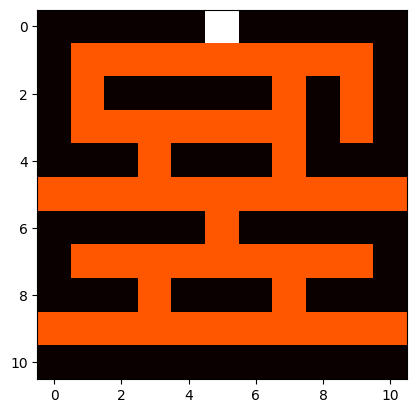

In [ ]:
print_map(rewards)

In [ ]:
print(get_shortest_path(7,5))

[[7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [3, 6], [3, 5], [3, 4], [3, 3], [3, 2], [3, 1], [2, 1], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [0, 5]]


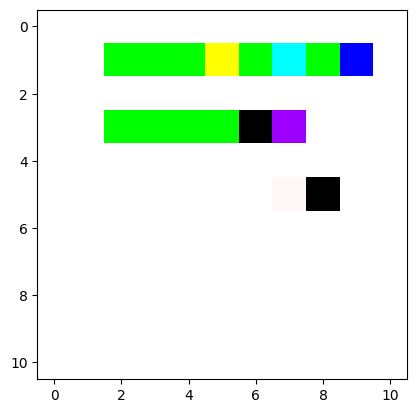

In [ ]:
print_map(q_values)